<a href="https://colab.research.google.com/github/darshandugar2004/XrayImageClassification-TransferLearning/blob/main/fused_model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import load_model
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = load_model('/kaggle/input/fusion_dataset/keras/default/1/model.keras')

Found 5978 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


187/187 ━━━━━━━━━━━━━━━━━━━━ 580s 3s/step
Accuracy 0.984610237537638
Confusion Matrix


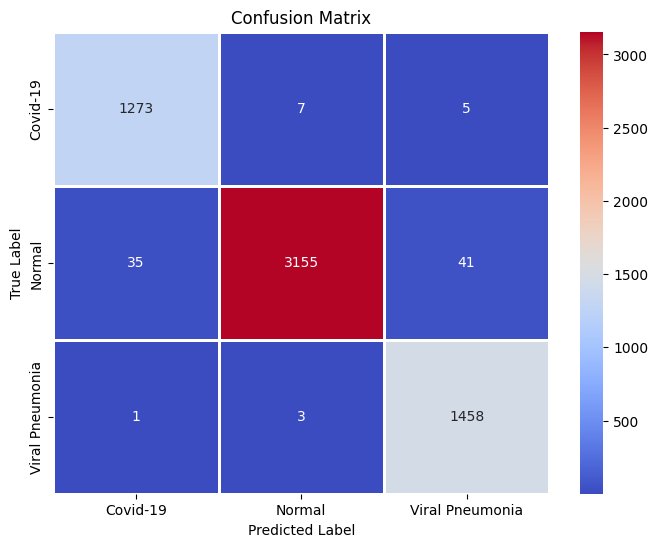

[[1273    7    5]
 [  35 3155   41]
 [   1    3 1458]]
Classification Report
                 precision    recall  f1-score   support

       covid-19       0.97      0.99      0.98      1285
         normal       1.00      0.98      0.99      3231
Viral Pneumonia       0.97      1.00      0.98      1462

       accuracy                           0.98      5978
      macro avg       0.98      0.99      0.98      5978
   weighted avg       0.98      0.98      0.98      5978



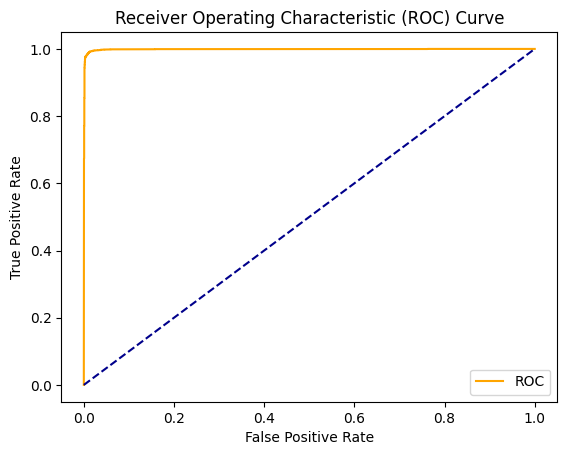

<Figure size 640x480 with 0 Axes>

In [ ]:
test_data_dir='/kaggle/input/cov-pneum/kaggle/working/Cov-Pneum-Split/test'
test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False)


from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix, roc_auc_score, auc, f1_score
test_labels = test_generator.classes
num_classes = len(test_generator.class_indices)
test_labels = to_categorical(test_labels, num_classes=num_classes)
preds = model.predict(test_generator)


predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
cm = confusion_matrix(y_pred=predictions, y_true=y_true)

print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns


LABELS = ["Covid-19","Normal","Viral Pneumonia"]

def show_confusion_matrix(validations, predictions):
    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.savefig('path', dpi=300)
    plt.show()

filenames = test_generator.filenames
nb_samples = len(filenames)

Y_pred =preds
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
show_confusion_matrix(test_generator.classes, y_pred)
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["covid-19","normal","Viral Pneumonia"]
print(classification_report(test_generator.classes, y_pred, target_names=target_names))
# Plot linewidth.
lw = 2

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig('path', dpi=300)

probs = Y_pred[:, 1]

fpr, tpr, thresholds = roc_curve(test_generator.classes, probs, pos_label=1)
roc_display =plot_roc_curve(fpr=fpr, tpr=tpr)